## A/B Testing

You have been working with a product manager on an A/B test aiming at increasing overall revenue generated. You have been provided with a dataset with some metrics at user level covering the period of the test (see ex4 file). Please provide an analysis of the A/B test and give some recommendations to the product manager.

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [227]:
train = pd.read_excel('data/ex4.xlsx')

In [178]:
train.head()

,user_id,rev_gbp,variant_name
0,100489,21.79877,control
1,101776,48.26052,variant
2,100257,36.17164,control
3,100120,34.05405,control
4,100628,27.40265,control


Let's check the test results and see if we can claim that we have significant evidence of an increase in revenue, or if the difference in the test and control groups could be random. 

The null hypothesis is that the mean revenue in both groups is equal. 
The alternative hypothesis - the mean revenue in the test group increased. 
And we estimate p-value=0.05

In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 3 columns):
user_id         2112 non-null int64
rev_gbp         2112 non-null float64
variant_name    2112 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 49.6+ KB


**We don't have any absent values**

In [180]:
control = train[train['variant_name'] == 'control']['rev_gbp']
variant = train[train['variant_name'] == 'variant']['rev_gbp']

**Let's plot distribution of target feature and test it for normality**

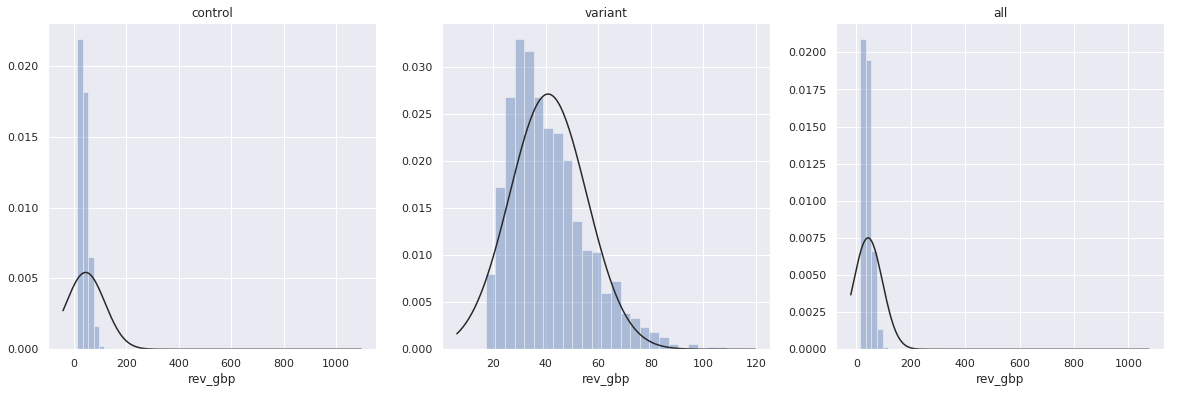

In [181]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].set_title('control')
axes[1].set_title('variant')
axes[2].set_title('all')
sns.distplot(control, kde=False, fit=st.norm, ax=axes[0])
sns.distplot(variant, kde=False, fit=st.norm, ax=axes[1])
sns.distplot(train['rev_gbp'], kde=False, fit=st.norm, ax=axes[2])

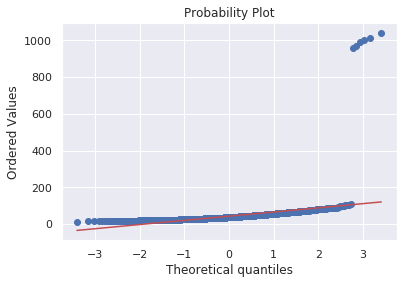

In [182]:
st.probplot(train['rev_gbp'], plot=plt);

In [183]:
st.shapiro(train['rev_gbp'])

(0.18519026041030884, 0.0)

**We can see outliars on plots and based on SW test we can't says that the data was drawn from a normal distribution.**

Next we can use two ways:
1. Try to use some transformation due to make it more normal.
2. Drop outliers, because all users with abnormally high values are in control group.

### 1. Transform data without dropping outliars

In [184]:
train['rev_gbp'] = np.log1p(train['rev_gbp'])
control = train[train['variant_name'] == 'control']['rev_gbp']
variant = train[train['variant_name'] == 'variant']['rev_gbp']

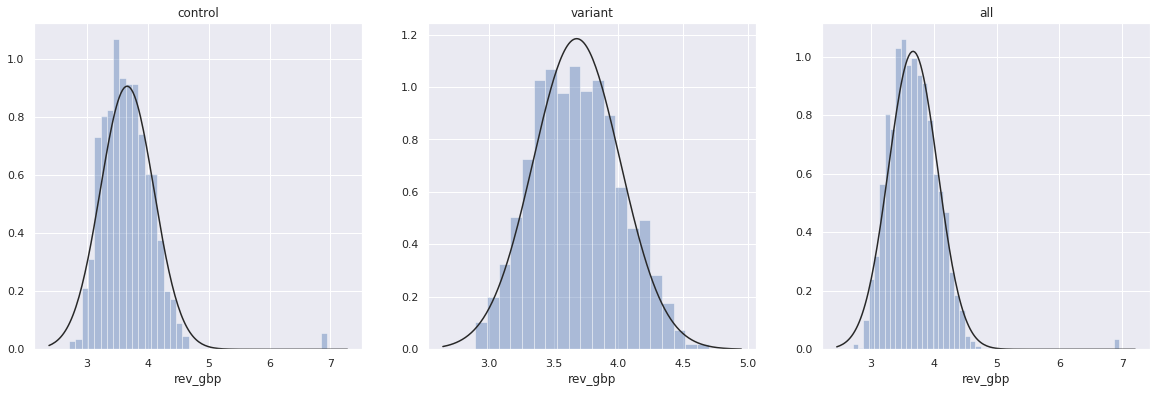

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].set_title('control')
axes[1].set_title('variant')
axes[2].set_title('all')
sns.distplot(control, kde=False, fit=st.norm, ax=axes[0]);
sns.distplot(variant, kde=False, fit=st.norm, ax=axes[1]);
sns.distplot(train['rev_gbp'], kde=False, fit=st.norm, ax=axes[2]);

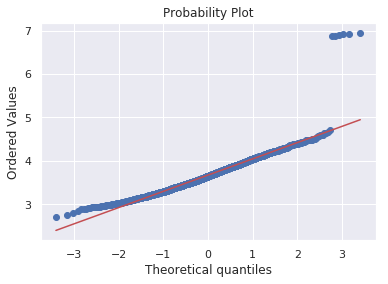

In [186]:
st.probplot(train['rev_gbp'], plot=plt);

In [187]:
st.shapiro(train['rev_gbp'])

(0.911014199256897, 1.746844849407399e-33)

Relying on SW-test we still can't said that data was drawn from a normal distribution. But distributions on plots seems quiet normal, also the fact is that when samples become very large, sample means are subject to normal law, even if the original variable is not normal or is measured with error. 

Let's use t-test for our hypothesis.

In [188]:
st.ttest_ind(control, variant)

Ttest_indResult(statistic=-0.6688131299262696, pvalue=0.5036878535084954)

Based on the result of the test, we cannot reject the null hypothesis that the mean revenue in both groups does not differ or that these differences are statistically significant. 

### 2. Transform data with dropping outliars

In [192]:
train = pd.pandas.read_excel('data/ex4.xlsx')

train.drop(train[(train['rev_gbp']>800)].index, inplace=True)
control = train[train['variant_name'] == 'control']['rev_gbp']
variant = train[train['variant_name'] == 'variant']['rev_gbp']

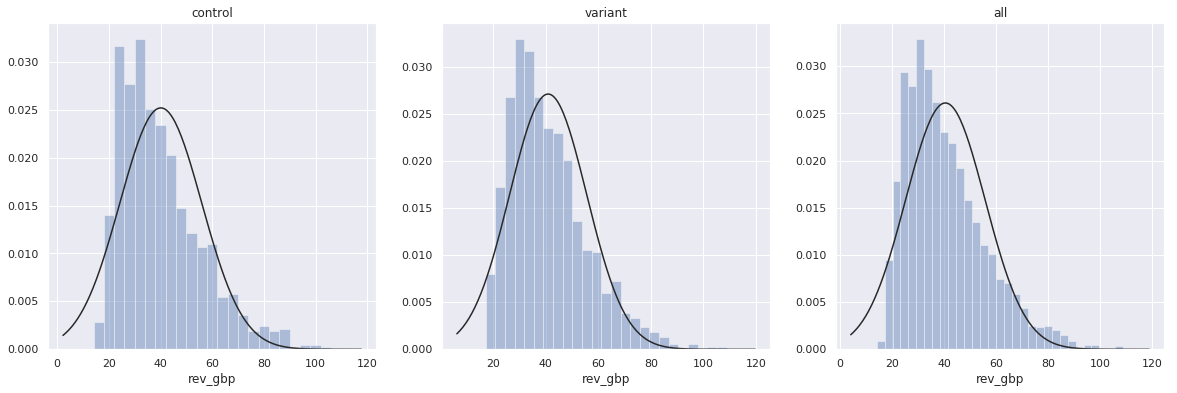

In [193]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].set_title('control')
axes[1].set_title('variant')
axes[2].set_title('all')
sns.distplot(control, kde=False, fit=st.norm, ax=axes[0]);
sns.distplot(variant, kde=False, fit=st.norm, ax=axes[1]);
sns.distplot(train['rev_gbp'], kde=False, fit=st.norm, ax=axes[2]);

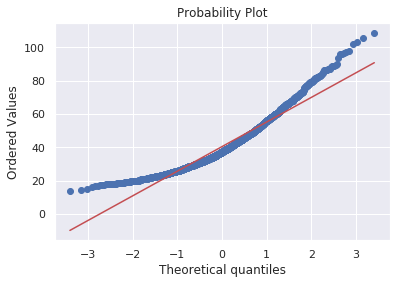

In [194]:
st.probplot(train['rev_gbp'], plot=plt);

In [195]:
st.shapiro(train['rev_gbp'])

(0.9337493181228638, 1.2727905260534078e-29)

Distributions without outliars look a little more normal, but we can also use log transformation to improve them.

In [196]:
train['rev_gbp'] = np.log1p(train['rev_gbp'])
control = train[train['variant_name'] == 'control']['rev_gbp']
variant = train[train['variant_name'] == 'variant']['rev_gbp']

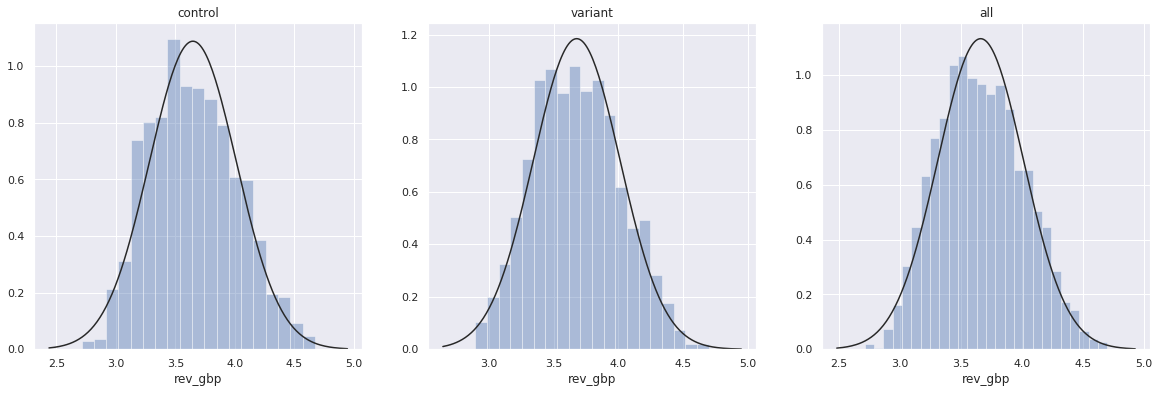

In [198]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].set_title('control')
axes[1].set_title('variant')
axes[2].set_title('all')
sns.distplot(control, kde=False, fit=st.norm, ax=axes[0]);
sns.distplot(variant, kde=False, fit=st.norm, ax=axes[1]);
sns.distplot(train['rev_gbp'], kde=False, fit=st.norm, ax=axes[2]);

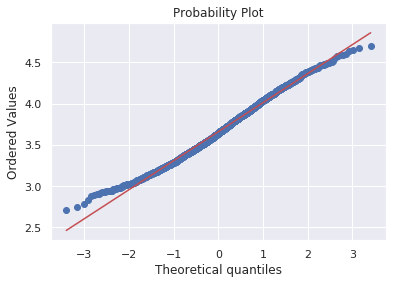

In [199]:
st.probplot(train['rev_gbp'], plot=plt);

In [200]:
st.shapiro(train['rev_gbp'])

(0.9924358129501343, 5.608165043469171e-09)

And again, we're calculating the t-statistics

In [206]:
st.ttest_ind(control, variant)

Ttest_indResult(statistic=-1.9484847619407348, pvalue=0.051489762029587785)

**This time p-value is also higher than the predefined value, so we also cannot reject the null hypothesis**